## Logistic regression 

In spite of its name, logistic regression is a model for classification, not regression. It is one of the most widely used machine learning models for binary and multiclass classification.
In case of binary classification of class 1 and 0, logistic regression computes the natural log of the odds that Y is equal to 1 (logit odds), which is simply the ratio of the probability that Y is 1 divided by the probability that Y is 0. 

 ![](../files/logistic.png)
 
,Where p = probability of y being class 1. This formula shows that the logistic regression model is a linear model for the log odds.
Instead of the log odds, we are actually interested in the quantity p, which is estimated by applying a sigmoid or logistic function (inverse form of the logit function) to the quantity in the right hand side of the above equation. The estimated probability of an observation belonging to class 1 is then given by,

![](../files/sigmoid.png)

Since the output of the sigmoid function always ranges between 0 and 1, the output value can be interpreted as the conditional probability of an observation belonging to the class. The loss function used in logistic regression is called log loss function, which takes the following form:

![](../files/logloss.png)

And the cost function over all training examples is given by,

![](../files/logcost.png)

Logistic regression can also be extended from binary classification to multi-class classification. Then it is called Multinomial Regression. Logistic regression is widely used in the industry setting when the interpretability of the model coefficients is the necessity. 


-2.3025850929940455

## Modeling class probabilities via logistic regression in Scikt-learn

class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)[source](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)¶

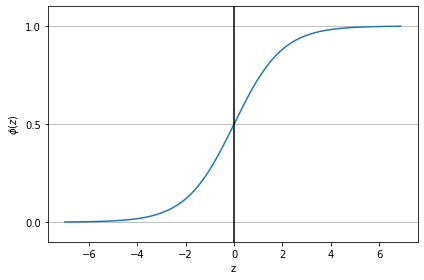

In [33]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### Load and vizualize Iris dataset


In [79]:
import warnings
warnings.filterwarnings('ignore')
#from sklearn import datasets
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


The data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray inside a dictionary in a pickled format. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

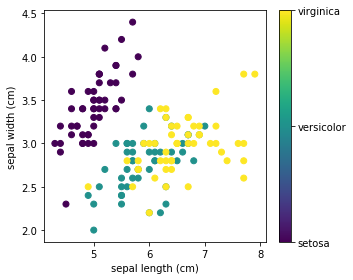

In [80]:

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [123]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, random_state = 1)

In [124]:
np.unique(y_train)

array([0, 1, 2])

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Create an instance of Logistic Regression Classifier and fit the data.

In [126]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state=0)
lr.fit(X_train_std, y_train);

In [127]:
from sklearn import metrics
y_pred = lr.predict(X_test_std);
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556

In [132]:
#metrics.roc_auc_score(y_test, y_pred)

### Get the probability for each test observation to beong to individual class

In [133]:
lr.predict_proba(X_test_std)

array([[9.87174882e-01, 1.28251177e-02, 2.25246728e-23],
       [1.26343963e-02, 9.87365588e-01, 1.58540753e-08],
       [4.75577937e-05, 9.99354723e-01, 5.97718879e-04],
       [9.88598098e-01, 1.14019019e-02, 2.37466173e-21],
       [1.01658776e-08, 5.27345313e-02, 9.47265458e-01],
       [2.27664559e-04, 8.99801129e-01, 9.99712063e-02],
       [6.11412113e-09, 8.33072668e-02, 9.16692727e-01],
       [9.77891720e-01, 2.21082798e-02, 3.85699457e-19],
       [8.60155840e-01, 1.39844160e-01, 5.08567988e-20],
       [1.75428111e-09, 8.99254817e-02, 9.10074517e-01],
       [1.08847509e-04, 9.99572428e-01, 3.18724961e-04],
       [9.84853790e-01, 1.51462100e-02, 4.00718053e-20],
       [4.01121385e-10, 2.23996097e-01, 7.76003903e-01],
       [2.39228260e-04, 9.94031078e-01, 5.72969414e-03],
       [3.22993413e-05, 9.81604729e-01, 1.83629717e-02],
       [8.89755345e-01, 1.10244655e-01, 9.59597386e-21],
       [9.88949887e-05, 9.99884224e-01, 1.68813808e-05],
       [2.22725159e-04, 9.70807

### Confusion metrics

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
